C:\Users\Richard Zha\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


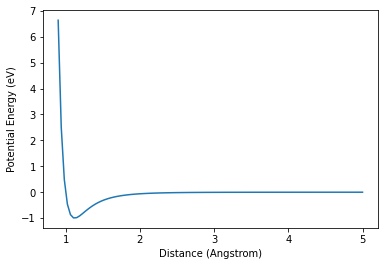

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import maxwell

# plot the ljp and force equations for testing
def ljp(r, epsilon, sigma):
    
    return  4 * epsilon * (np.power((sigma/r), 12) - np.power((sigma/r), 6))

def force(r, epsilon, sigma):
    r_sq = r * r
    inv_r_sq = 1/(r_sq)
    pinv_r_sq = sigma/(r_sq)
    term2 = pinv_r_sq * pinv_r_sq * pinv_r_sq
    term1 = term2 * term2
    forcex = delta_x * (24 * epsilon * ((2*term1) - term2) * inv_r_sq)  # noqa
    forcey = delta_y * (24 * epsilon * ((2*term1) - term2) * inv_r_sq)  # noqa

    return np.power((forcex * forcex + forcey * forcey), 0.5)

epsilon = 1
sigma = 1
r = np.linspace(.9, 5, 100)
plt.plot(r, ljp(r, epsilon, sigma))
plt.xlabel('Distance (Angstrom)')
plt.ylabel('Potential Energy (eV)')
plt.show()


In [2]:
# test plotting the boltzmann distribution
T = 0.5
N = 1000

Text(0, 0.5, 'Frequency')

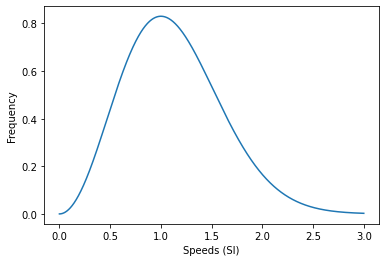

In [8]:
def maxwell(c, T):
    coef1 = 4 * np.pi * np.power(1 / (2 * np.pi * 1 * T), 1.5)
    exp = np.power(np.e, (-1 * 0.5 * 1 * c * c)/(1 * T))
    return coef1 * c * c * exp

speeds = np.arange(0, 3, .001)
y = [maxwell(c, T) for c in speeds]
plt.plot(speeds, y)
plt.xlabel("Speeds (SI)")
plt.ylabel("Frequency")

In [1]:
from engine1 import Engine
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import maxwell


C:\Users\Richard Zha\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
e = Engine()
e.load_settings()
e.init_simulation()

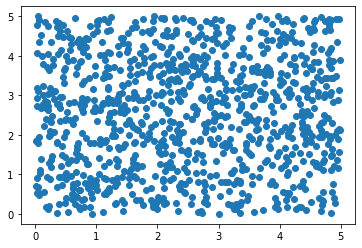

In [37]:
e.N = 1000
e.pos = np.random.uniform(
            low=0.0, high=5, size=(e.N, e.DIM))
ax = plt.scatter(e.pos[:, 0], e.pos[:, 1])

[-2.29014522e-01 -7.07582587e-01  1.09933141e+00  7.03936690e-01
  4.07915920e-01  1.28284118e+00  9.93435224e-01  1.71906245e+00
  1.93364365e-01 -6.30216044e-01 -2.89078640e-01 -3.47748266e-01
  3.63001839e-01  7.35885756e-01  1.19349526e-01  5.83060629e-01
 -2.22086024e-01 -1.91654762e-01  7.45323925e-01 -6.00758053e-02
  7.62717679e-02  6.18245575e-01 -2.47699627e-01 -7.36057126e-01
  6.70502777e-01 -2.38495187e+00  8.90121481e-01 -8.50200841e-02
  8.62717103e-01  1.66878085e-01 -7.04073804e-01  6.26640211e-01
  6.73917531e-01 -9.19346881e-01  1.30018701e+00  2.13055538e-03
 -2.89704571e-01  1.09544253e+00  7.22328668e-01 -1.12154659e+00
 -6.71180338e-01 -7.19897355e-01  9.29344577e-01 -9.27350154e-01
  9.34557956e-01 -3.07293961e-01  1.79711789e+00  4.73411630e-01
  6.60687149e-01  1.18338319e-01  8.24886991e-01 -2.00298765e-01
 -9.99250938e-01 -1.09279375e+00  5.64497121e-01  1.52291594e+00
  3.81147046e-01 -5.93016905e-01  1.21345315e+00 -6.19563187e-01
  7.72402010e-01 -4.06197

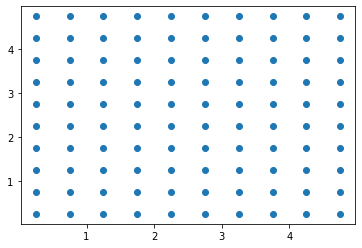

In [11]:
ax1 = plt.scatter(e.pos[:, 0], e.pos[:, 1])
#ax1 = plt.scatter(xlist, ylist)
print(e.vel[:, 0])